In [ ]:
pip install google-play-scraper


In [34]:
from google_play_scraper import reviews, Sort
import csv

result, _ = reviews(
    'id.go.pajak.djp',
    lang='en',
    country='us',
    sort=Sort.NEWEST,
    count=500,
    filter_score_with=None
)

filename = 'ulasan_djp.csv'


with open(filename, 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=['userName', 'score', 'at', 'content'])
    writer.writeheader()
    for review in result:

        writer.writerow({
            'userName': review['userName'],
            'score': review['score'],
            'at': review['at'],
            'content': review['content']
        })

print(f"Berhasil menyimpan {len(result)} ulasan ke '{filename}'")

Berhasil menyimpan 500 ulasan ke 'ulasan_djp.csv'


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


File 'ulasan_google_play.csv' exists with size: 43709 bytes
First 5 lines of the CSV file:
userName,score,at,content
Precious Lakot,5,2025-12-11 14:27:21,it not bad
Surendra Mole,5,2025-12-11 14:27:14,super
Gabriel Michael,1,2025-12-11 14:26:28,"I wish there was a 0 star option, Whatsapp is becoming really annoying, I just got a new sim and each time I add my contacts and message them even if it is the shortest message It says ""this account can no longer use Whatsapp, please request a review 😒😒, I have to wait 24hrs before they ask me to verify, that's not all ☺️, after the review if I go back to message one of my contacts already or even look at someone's DP, it says the same thing , It's becoming annoying and I hope it's fixed soon"
Asha Purkayastha,5,2025-12-11 14:26:18,One of best youtube r
           userName  score                   at  \
0    Precious Lakot      5  2025-12-11 14:27:21   
1     Surendra Mole      5  2025-12-11 14:27:14   
2   Gabriel Michael      1  2025-12-11 1

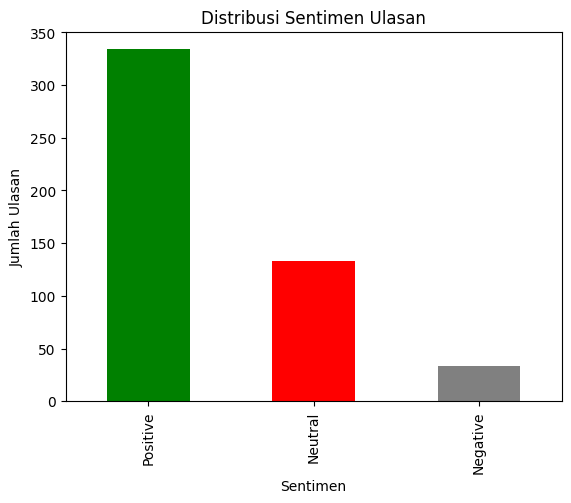

In [35]:
!pip install pandas textblob matplotlib nltk

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Uncommenting as suggested by LookupError

# --- Added diagnostic step here ---
import os
if os.path.exists("ulasan_google_play.csv"):
    print(f"File 'ulasan_google_play.csv' exists with size: {os.path.getsize('ulasan_google_play.csv')} bytes")
    with open("ulasan_google_play.csv", 'r', encoding='utf-8') as f:
        print("First 5 lines of the CSV file:")
        for i, line in enumerate(f):
            if i < 5:
                print(line.strip())
            else:
                break
else:
    print("File 'ulasan_djp.csv' does not exist.")
# ----------------------------------

df = pd.read_csv("ulasan_google_play.csv") # Corrected filename
print(df.head()) # Fixed SyntaxError: missing parenthesis

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"[^a-z\s]", '', text)
    tokens = word_tokenize(text)
    # Corrected stopwords language to 'indonesian'
    tokens = [word for word in tokens if word not in stopwords.words('indonesian')]
    return ' '.join(tokens)

df['clean_content'] = df['content'].apply(clean_text) # Corrected column name to 'content'


def sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['clean_content'].apply(sentiment)

print(df.head())
print(df['sentiment'].value_counts())

df['sentiment'].value_counts().plot(kind='bar', color=['green','red','gray'])
plt.title("Distribusi Sentimen Ulasan") # Updated title for context
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.show()